In [77]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/usr/local/lib/python3.9/site-packages')

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
import folium
from folium.plugins import HeatMap


from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor

from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
import tensorflow as tf

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [78]:
cars_df = pd.read_csv('/Users/bruce/Library/CloudStorage/OneDrive-Личная/DocumentsMacOneDrive/Karpov.Course1/Stat_module/lesson7/cars.csv', sep = ',' )
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [79]:

cars_df.dtypes, cars_df.shape


(car_ID                int64
 symboling             int64
 CarName              object
 fueltype             object
 aspiration           object
 doornumber           object
 carbody              object
 drivewheel           object
 enginelocation       object
 wheelbase           float64
 carlength           float64
 carwidth            float64
 carheight           float64
 curbweight            int64
 enginetype           object
 cylindernumber       object
 enginesize            int64
 fuelsystem           object
 boreratio           float64
 stroke              float64
 compressionratio    float64
 horsepower            int64
 peakrpm               int64
 citympg               int64
 highwaympg            int64
 price               float64
 dtype: object,
 (205, 26))

In [80]:
cars_df.isna().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [81]:
# посмотрим дубликаты, ибо может на модели сказаться
cars_df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

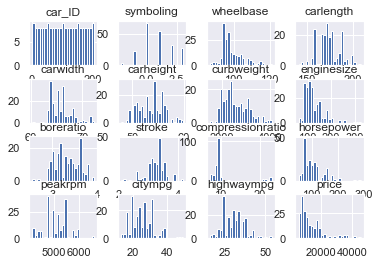

In [82]:
# посомтрим распределние
# A histogram is the graphical representation of quantitative data.

cars_df.hist(bins = 25)  



In [84]:
cars_df['cylindernumber'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}, inplace=True)
cars_df['doornumber'].replace({'two':2, 'four':4}, inplace=True)



In [85]:
fghjkl;'
'  let make it more logical
1) reach out all CATEGORACAL columns
2) a nd then only - to get dummies

SyntaxError: EOL while scanning string literal (3395634165.py, line 1)

In [90]:
# ** как видим у нас присутсует катег данные и дляработы в модели, лучше обработаь их


cars_df.select_dtypes(include=['object']).columns
# cars_df.dtypes

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [ ]:
cars_df = pd.get_dummies(cars_df, columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'])

In [100]:
# 1) сокращу, до одного слова

# приводим в одному регистру
cars_df.columns  =cars_df.columns.str.lower()

# сомтрю что там у CarName
cars_df.carname.unique()

#  посомтрим колл уникальныз признаков , id можно убрать, с carname и curbweight и остальными можно посомтреть,что можно сделать
cars_df.nunique()

car_id              205
symboling             6
carname             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [102]:
# вынул все названия, преобразовал серию в список
attempt = list(cars_df.carname.str.lower())
attempt

# создал список будущей колонки, проинерировал, раздеил по пробелц и взял первый эл-т[0]
# !!! А ВОТ В ОДНУ СТРОЧКУ)
# cars['company'] = cars['carname'].apply(lambda x : x.split[0])
company = []
for i in attempt:
    u = i.split(' ')[0]
    company.append(u)

In [103]:
# добавляю и удалю столбцы  Столбец CarName с 
# полным названием машины удалите из датасета, а также car_ID, они не пригодятся для 
# дальнейшего анализа.

cars_df.drop( columns = ['carname', 'car_id'], axis = 1, inplace=True)
cars_df['company'] = company

In [104]:
col_dummies  =cars_df.select_dtypes(include=['object']).columns

cars_df = pd.get_dummies(cars_df, columns =  col_dummies)

cars_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_alfa-romero,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


   
       Пока модель не составлена можно посомтреть допущения по признакам, выборосы и коллинеарность.
       

In [134]:
# df.select_dtypes(include=['object']).columns


#поробуем посмотреть изначальные прищнаки (колличественный тип), а не сформированне фиктивные
features_ = cars_df.columns[:16]
features_

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg'],
      dtype='object')

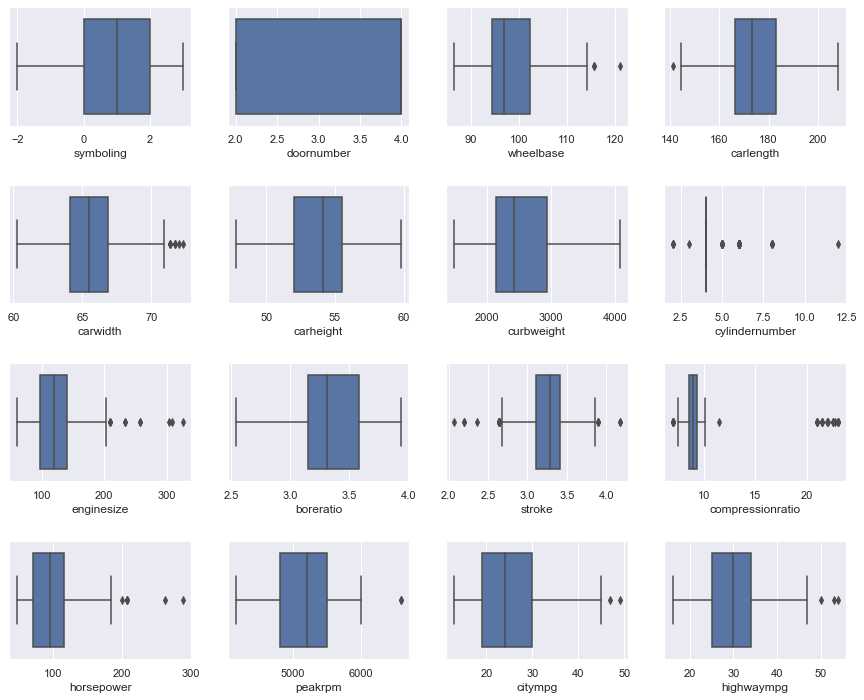

In [156]:
#  ПОМОГЛО https://engineeringfordatascience.com/posts/matplotlib_subplots/

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
for i, ax in zip(features_, axs.ravel()):
    # filter df for ticker and plot on specified axes
#     df[df["ticker"] == ticker].plot(ax=ax)
    sns.boxplot(cars_df[i], ax=ax)


# зАуПталсЯ
# for i in features_:
        
# #   l = cars_df[i]
#     print(sns.boxplot(cars_df[i], palette="flare"))

In [ ]:
cars_df.head()

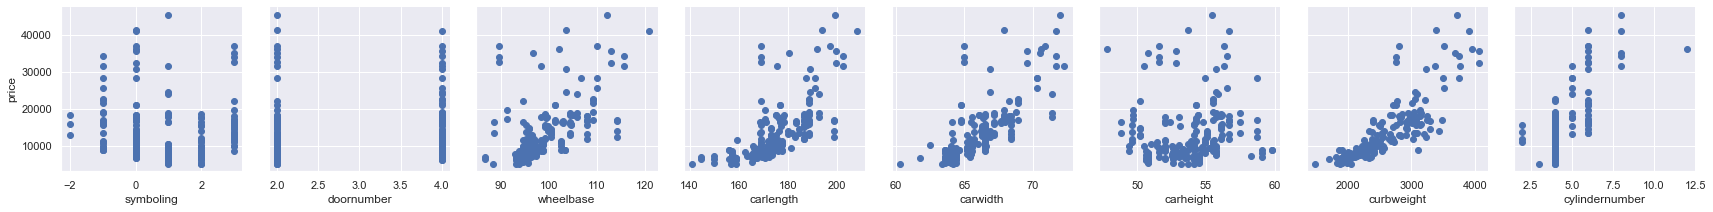

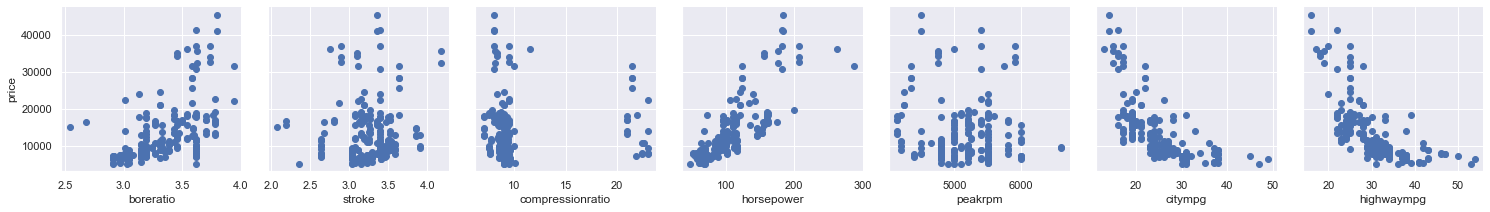

In [166]:
# Map in Python is a function that works as an iterator to return a result after applying a function to 
# every item of an iterable (tuple, lists, etc.). It is used when you want to apply a single transformation 
# function to all the iterable elements
    
sns.PairGrid(cars_df,y_vars='price',x_vars=cars_df[features_].columns[0:8], height=3).map(plt.scatter)
sns.PairGrid(cars_df,y_vars='price',x_vars=cars_df[features_].columns[9:], height=3).map(plt.scatter)

# тут удобно получилось, исполнение и примение одной функции,через маp применился к уже получившемся результату 
# другой функции

In [167]:
#    put down your own info about VIF (above and bolow BUT before compare results, it seeems they are diif)

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = cars_df.loc[:, cars_df.columns != 'price']

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.sort_values('VIF', ascending=False).head(30)
# тутя виду что фиктивные пеменные имеют знаечния inf , попробую без них

vif_data.query('VIF != inf').sort_values('VIF', ascending=False).head(30)


,feature,VIF
11,compressionratio,181.885982
8,enginesize,64.197325
14,citympg,52.830468
15,highwaympg,46.404663
12,horsepower,45.266243
6,curbweight,41.213611
7,cylindernumber,29.423214
3,carlength,23.428298
2,wheelbase,19.660319
4,carwidth,15.263146


In [180]:
df_num_clean = cars_df[features_].copy()

df_num_clean.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22


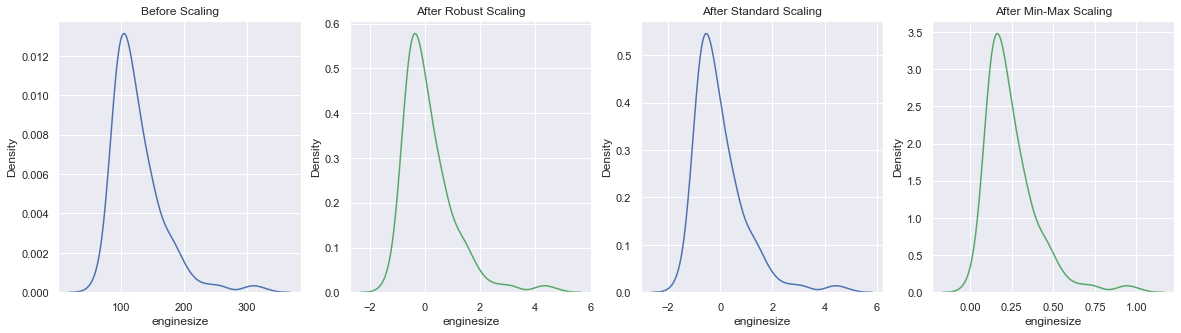

In [186]:
# Теория

# MinMaxScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#     Transform features by scaling each feature to a given range.
#     This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
#     The transformation is given by:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
# * Это преобразование часто используется в качестве альтернативы масштабированию единичной дисперсии с нулевым средним значением.


# StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#     Standardize features by removing the mean and scaling to unit variance.
#     The standard score of a sample x is calculated as:

# z = (x - u) / s

# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

        
# RobustScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
# Scale features using statistics that are robust to outliers.

# This Scaler removes the median and scales the data according to the quantile range 
# (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile)
# and the 3rd quartile (75th quantile).
        

# 1) как в статье рекомендовано сначала  RobustScaler()
cols = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']
scaler = preprocessing.RobustScaler()
robust_df_ = scaler.fit_transform(df_num_clean)
robust_df_ = pd.DataFrame(robust_df_, columns =cols)
 
    
    
    
    
# 2)   разница меж minmax and atandard scalers 
#     StandardScaler перемасштабирует набор данных, чтобы иметь среднее значение 0 и стандартное отклонение 1.
# Стандартизация очень полезна, если данные имеют различные масштабы и предположение алгоритма о данных, 
# имеющих гауссово распределение.

#     Нормализация или MinMaxScaler изменяет масштаб набора данных, чтобы каждое значение находилось 
#     в диапазоне от 0 до 1. Это полезно, когда данные имеют разные масштабы, а алгоритм НЕ ДЕЛАЕТ
#     предположений о распределении. Это хороший метод, когда мы не знали о распределении данных или
#     когда мы знаем, что распределение не является гауссовым.
# https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler    
    
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_num_clean)
standard_df = pd.DataFrame(standard_df, columns =cols)
  
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_num_clean)
minmax_df = pd.DataFrame(minmax_df, columns =cols)
  
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4 , figsize =(20, 5))
ax1.set_title('Before Scaling')
  
sns.kdeplot(df_num_clean['enginesize'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
  
sns.kdeplot(robust_df_['enginesize'], ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(standard_df['enginesize'], ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(minmax_df['enginesize'], ax = ax4, color ='g')
plt.show()

In [187]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [188]:
robust_scaled = RobustScaling(df_num_clean, ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg'])

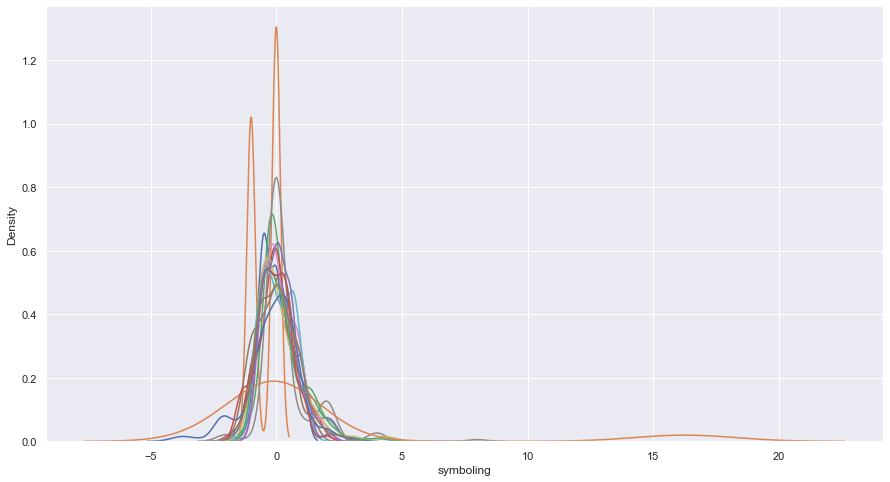

In [189]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in cols:
    sns.kdeplot(robust_scaled[i], legend=True)

In [191]:
clean_df = cars_df.copy()
clean_df.drop(labels=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg'], axis="columns", inplace=True)
clean_df[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']] = robust_scaled[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']]


In [193]:
clean_df.head(2)

,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_alfa-romero,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,-1.063291,-0.261905,-0.5,-1.514286,0.16962,0.0,0.227273,0.372093,-2.033333,0.0,0.347826,-0.285714,-0.272727,-0.333333
1,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,-1.063291,-0.261905,-0.5,-1.514286,0.16962,0.0,0.227273,0.372093,-2.033333,0.0,0.347826,-0.285714,-0.272727,-0.333333


In [194]:
#replace!!!  write anothe two way for reduce or select factors

x_clean = clean_df.drop(['price'] , axis = 1).values
y_clean = clean_df['price'].values

x_clean.shape

(205, 72)

In [195]:
pca = PCA(n_components=0.99)
x_reduced = pca.fit_transform(x_clean)

print("Number of original features is {} and of reduced features is {}".format(x_clean.shape[1], x_reduced.shape[1]))

Number of original features is 72 and of reduced features is 29


In [196]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(x_clean, y_clean, test_size=0.1, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_reduced, y_clean, test_size=0.1, random_state=42)

In [197]:
clean_evals = dict()
reduced_evals = dict()
def evaluate_regression(evals, model, name, X_train, X_test, y_train, y_test):
    train_error = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_error = mean_squared_error(y_test, model.predict(X_test), squared=False)
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_error, test_error, r2_train, r2_test]
    print("Training Error " + str(name) + " {}  Test error ".format(train_error) + str(name) + " {}".format(test_error))
    print("R2 score for " + str(name) + " training is {} ".format(r2_train*100) + " and for test is {}".format(r2_test*100))

In [198]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
    plt.figure(figsize=(10,6))
    plt.plot(df[:20])
    plt.legend(['Actual' , 'Predicted'])

In [199]:
rlr = Ridge(alpha=0.9).fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,rlr, "Ridge Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Error Ridge Regression 1635.550782882345  Test error Ridge Regression 2125.972389005537
R2 score for Ridge Regression training is 95.65838450434953  and for test is 94.35670940127882


In [200]:
reduced_rlr = Ridge(alpha=0.9).fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,reduced_rlr, "Reduced Ridge Regression", X_train_r, X_test_r, y_train_r, y_test_r)

Training Error Reduced Ridge Regression 2319.9039270391186  Test error Reduced Ridge Regression 2520.6644446938267
R2 score for Reduced Ridge Regression training is 91.26499229889234  and for test is 92.06682114004573


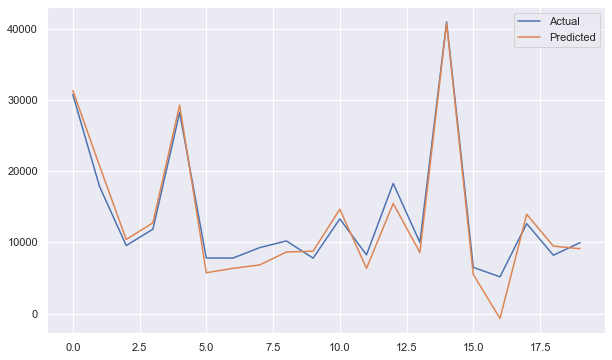

In [201]:
plot_predictions(rlr, X_test_clean, y_test_clean)

In [202]:
huber = HuberRegressor().fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,huber, "Robust Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Error Robust Regression 1752.1843262773461  Test error Robust Regression 2268.807653533959
R2 score for Robust Regression training is 95.0170919360707  and for test is 93.57293736942727


In [203]:
huber_r = HuberRegressor().fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,huber_r, "Reduced Robust Regression", X_train_r, X_test_r, y_train_r, y_test_r)

Training Error Reduced Robust Regression 2413.9397193328446  Test error Reduced Robust Regression 2178.2791017035483
R2 score for Reduced Robust Regression training is 90.54250471225106  and for test is 94.07560202579656


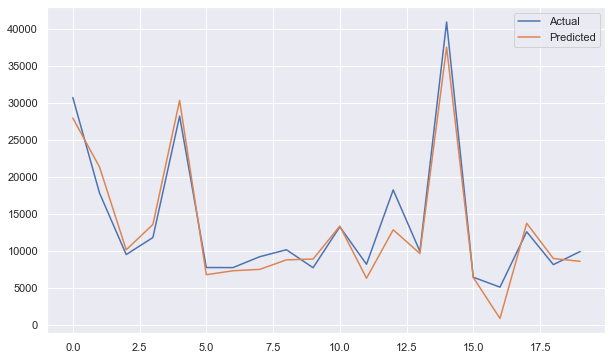

In [204]:
plot_predictions(huber, X_test_clean, y_test_clean)

In [205]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,rf, "RandomForest Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Error RandomForest Regression 843.4185816039527  Test error RandomForest Regression 2228.6615266041126
R2 score for RandomForest Regression training is 98.84545830445123  and for test is 93.7983763564199


In [206]:
rf_r = RandomForestRegressor(n_estimators=100).fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,rf_r, "Reduced RandomForest Regression", X_train_r, X_test_r, y_train_r, y_test_r)

Training Error Reduced RandomForest Regression 1019.45935989225  Test error Reduced RandomForest Regression 2408.149548420106
R2 score for Reduced RandomForest Regression training is 98.31320180636193  and for test is 92.75924117870527


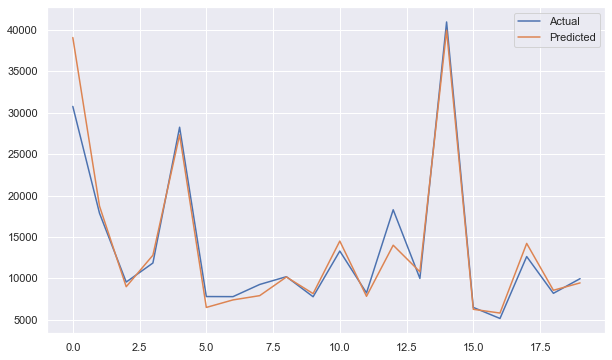

In [207]:
plot_predictions(rf, X_test_clean, y_test_clean)